In [4]:
import geopandas as gpd

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [12]:
world.geometry.name
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')
world.geometry.name
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,borders
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


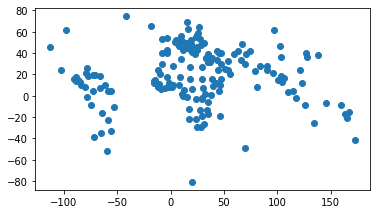

In [14]:
world['centroid_column'] = world.centroid

world = world.set_geometry('centroid_column')

world.plot();

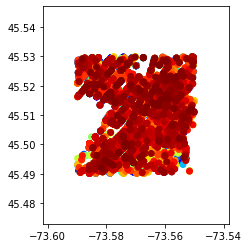

In [260]:
import fiona

file = gpd.read_file("C:\\Users\\atomi\\Desktop\\AAAA\\crime_dt.shp")
file.head()
file.geometry.name

file['centroid_column'] = file.centroid
file = file.set_geometry('centroid_column')
file.plot();

In [211]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


file2 = gpd.read_file("C:\\Users\\atomi\\Desktop\\AAAA\\crime_dt.shp")
file2.head()

#file2.plot(color = 'yellow', edgecolor="red",alpha=0.5,figsize=(12,12),scheme='quantiles',legend=True)

dataframe = file2.geometry
df = pd.DataFrame()
df['lat'] = dataframe.geometry.x
df['long'] = dataframe.geometry.y


In [142]:
group_value = df.groupby(['lat','long']).size().reset_index(name='counts')
mean = group_value['counts'].mean(axis=0)
stddev = group_value['counts'].std(axis=0)
group_value.sort_values(['lat'],axis=0, 
                 ascending=True, inplace=True)
group_value
print(str(mean) + ' ' + str(stddev) )

16.15123194562447 18.5311624081898


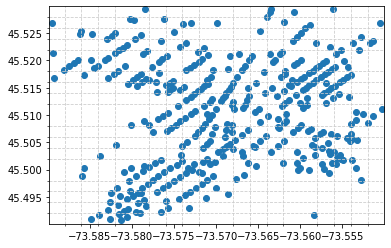

In [251]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
min_x = group_value.lat.min()
max_x = group_value.lat.max()
min_y = group_value.long.min()
max_y = group_value.long.max()

axes = plt.gca()
axes.set_xlim([min_x,max_x])
axes.set_ylim([min_y,max_y])

axes.xaxis.set_minor_locator(MultipleLocator(0.002))
axes.yaxis.set_minor_locator(MultipleLocator(0.002))

#xticks = np.arange(min_x,max_x,0.002)
#yticks = np.arange(min_y,max_y,0.002)
#axes.set_xticks(xticks)
#axes.set_yticks(yticks)

axes.grid(which='minor', color='#CCCCCC', linestyle='--')
plt.scatter(above_mean.lat,above_mean.long)

plt.show()


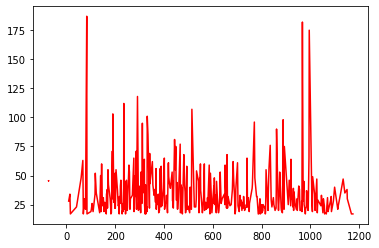

In [259]:
lat_grouping = df.groupby(['long']).size().reset_index(name='counts')
lat_grouping

above_mean = group_value[group_value.counts > mean]
plt.plot(above_mean.lat, above_mean.long, above_mean.counts)

 